# 🩻 Bone Fracture Detection using Deep Learning  

<img src="D:\python for data science\skeleton xray GIF.gif" width="400" />




In [110]:
import tensorflow as tf 
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [111]:
traingen=ImageDataGenerator(    
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)

train_genertor=traingen.flow_from_directory(
   r"D:\python for data science\Bone_Fracture_Binary_Classification\Bone_Fracture_Binary_Classification\train",
    target_size=(150 , 150),
    batch_size=32,
    class_mode="binary",
    color_mode="rgb"
)
val_genertor=traingen.flow_from_directory(
    r'\python for data science\Bone_Fracture_Binary_Classification\Bone_Fracture_Binary_Classification\val',
    target_size=(150 , 150),
    batch_size=32,
    class_mode="binary", 
    color_mode="rgb"
)
test_genertor=traingen.flow_from_directory(
    r'\python for data science\Bone_Fracture_Binary_Classification\Bone_Fracture_Binary_Classification\test',
    target_size=(150 , 150),
    batch_size=32,
    class_mode="binary" ,#علي حسب الداتا باينري كلاسفكيش ولا مالتي
    color_mode="rgb"
)


Found 9246 images belonging to 2 classes.
Found 829 images belonging to 2 classes.
Found 506 images belonging to 2 classes.


##Show some Images

In [112]:
import cv2

img = train_genertor[0][0][0]

img = img.astype("uint8")
cv2.imshow("X-ray Sample", img)
cv2.waitKey(0)          
cv2.destroyAllWindows()  



In [113]:
img = train_genertor[0][0][25]

img = img.astype("uint8")
cv2.imshow("X-ray Sample", img)
cv2.waitKey(0)          
cv2.destroyAllWindows()  


In [114]:
img = train_genertor[0][0][15]

img = img.astype("uint8")
cv2.imshow("X-ray Sample", img)
cv2.waitKey(0)          
cv2.destroyAllWindows()  


In [115]:
img = train_genertor[0][0][23]

img = img.astype("uint8")
cv2.imshow("X-ray Sample", img)
cv2.waitKey(0)          
cv2.destroyAllWindows()  


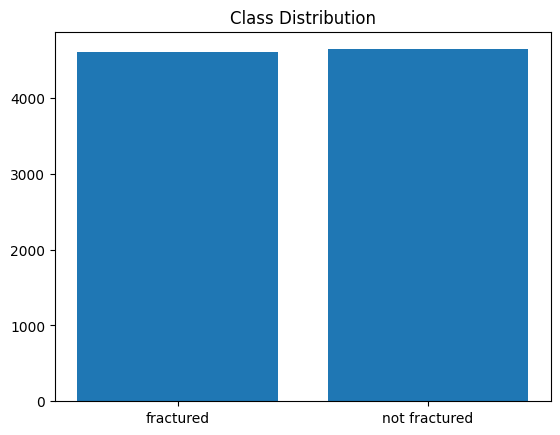

In [116]:
import matplotlib.pyplot as plt
import numpy as np

labels = list(train_genertor.class_indices.keys())
counts = np.bincount(train_genertor.classes)

plt.bar(labels, counts)
plt.title("Class Distribution")
plt.show()


In [117]:


model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D((2,2)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])



d:\python for data science\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [118]:
callback = keras.callbacks.EarlyStopping(monitor='loss',
patience=3)

In [119]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

model.fit(train_genertor , epochs=10 , callbacks=[callback], validation_data=val_genertor)



d:\python for data science\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - accuracy: 0.5510 - loss: 1.3584

d:\python for data science\.venv\Lib\site-packages\PIL\Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


289/289 ━━━━━━━━━━━━━━━━━━━━ 161s 548ms/step - accuracy: 0.5512 - loss: 1.3564 - val_accuracy: 0.6116 - val_loss: 0.6608
Epoch 2/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 144s 497ms/step - accuracy: 0.7267 - loss: 0.5989 - val_accuracy: 0.7551 - val_loss: 0.5146
Epoch 3/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 124s 430ms/step - accuracy: 0.7491 - loss: 0.5526 - val_accuracy: 0.7660 - val_loss: 0.5003
Epoch 4/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 150s 519ms/step - accuracy: 0.7770 - loss: 0.5145 - val_accuracy: 0.6538 - val_loss: 0.5911
Epoch 5/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 131s 450ms/step - accuracy: 0.7912 - loss: 0.4829 - val_accuracy: 0.8130 - val_loss: 0.4526
Epoch 6/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 135s 468ms/step - accuracy: 0.8139 - loss: 0.4494 - val_accuracy: 0.7841 - val_loss: 0.4808
Epoch 7/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 127s 439ms/step - accuracy: 0.8355 - loss: 0.4076 - val_accuracy: 0.7901 - val_loss: 0.4594
Epoch 8/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 132s 456ms/step - accuracy: 0.8366 - loss: 0.40

In [120]:
loss, acc = model.evaluate(test_genertor)
print(f"Test Accuracy: {acc:.2f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 416ms/step - accuracy: 0.7488 - loss: 0.6084
Test Accuracy: 0.77


16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 405ms/step
              precision    recall  f1-score   support

           0       0.48      0.57      0.52       238
           1       0.54      0.45      0.49       268

    accuracy                           0.51       506
   macro avg       0.51      0.51      0.51       506
weighted avg       0.51      0.51      0.50       506



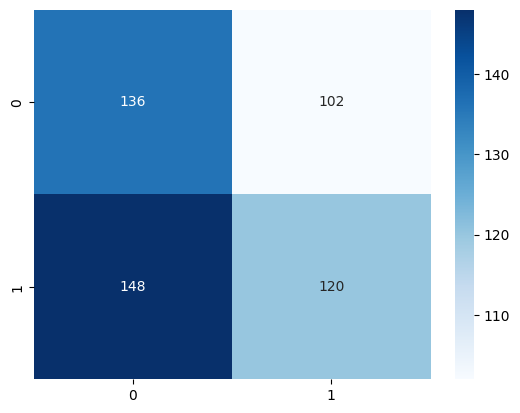

In [121]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns

y_pred = (model.predict(test_genertor) > 0.5).astype("int32")
print(classification_report(test_genertor.classes, y_pred))

cm = confusion_matrix(test_genertor.classes, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.show()


#For Save The Model

In [122]:
model.save_weights("bone_fracture.weights.h5")


